In [1]:
# simulation.ipynb
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

# Import the required classes and modules
from environment import TrafficEnvironment
from agent import RuleBasedAgent
from agent import RandomAgent

Results for RuleBasedAgent
Average reward over 1000 episodes: -4137.53
Standard deviation of rewards: 11243.32
Average number of steps per episode: 624.27
Standard deviation of steps: 814.49


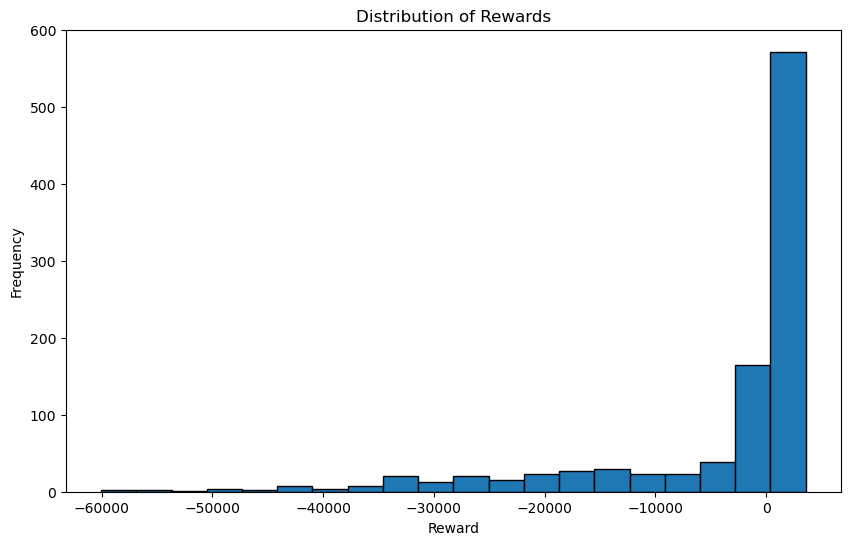

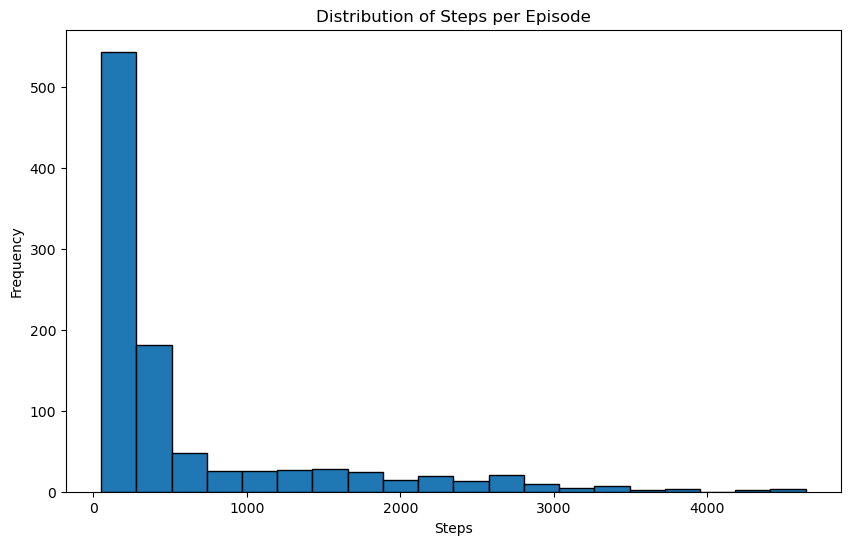

In [2]:
# Define the run_episode function
def run_episode(env, agent):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        total_reward += reward
        state = next_state
        steps += 1
    
    return total_reward, steps

# Run simulations
env = TrafficEnvironment()
agent = RuleBasedAgent()
num_episodes = 1000
rewards = []
steps_list = []

for _ in range(num_episodes):
    episode_reward, episode_steps = run_episode(env, agent)
    rewards.append(episode_reward)
    steps_list.append(episode_steps)

# Analyze and visualize results
print(f"Results for {agent.__class__.__name__}")
print(f"Average reward over {num_episodes} episodes: {np.mean(rewards):.2f}")
print(f"Standard deviation of rewards: {np.std(rewards):.2f}")
print(f"Average number of steps per episode: {np.mean(steps_list):.2f}")
print(f"Standard deviation of steps: {np.std(steps_list):.2f}")

# Plot histogram of rewards
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, edgecolor='black')
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of steps
plt.figure(figsize=(10, 6))
plt.hist(steps_list, bins=20, edgecolor='black')
plt.title('Distribution of Steps per Episode')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

Results for RandomAgent, change lane percent 100
Average reward over 1000 episodes: -10822.94
Standard deviation of rewards: 15515.48
Average number of steps per episode: 988.67
Standard deviation of steps: 1034.04


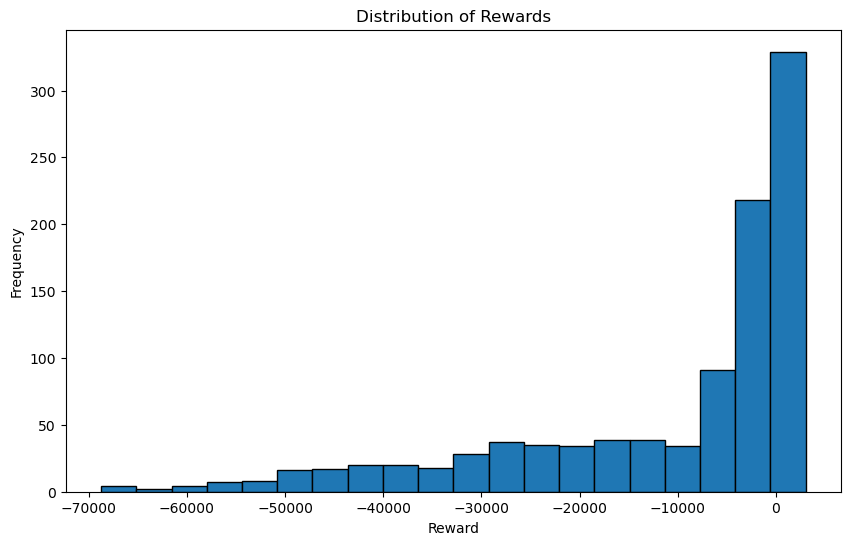

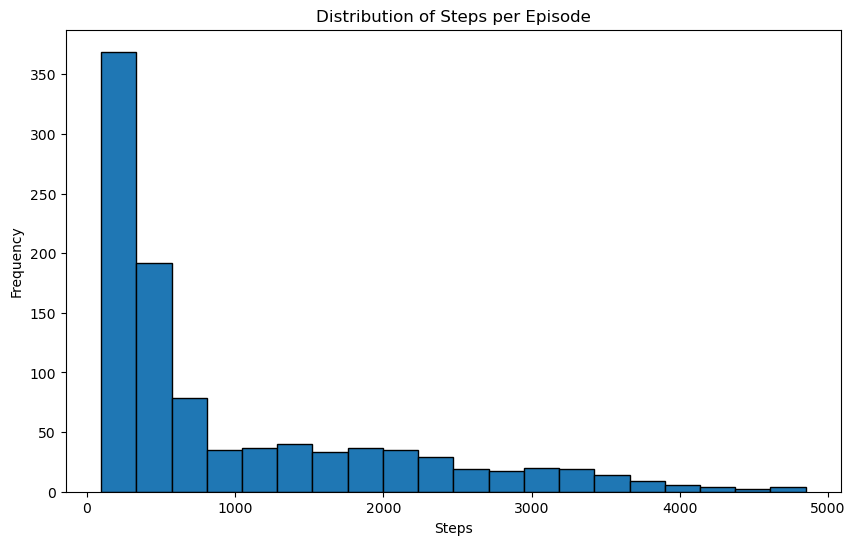

In [3]:
# Run simulations
env = TrafficEnvironment()
agent = RandomAgent(change_lane_percentage=100)
num_episodes = 1000
rewards = []
steps_list = []

for _ in range(num_episodes):
    episode_reward, episode_steps = run_episode(env, agent)
    rewards.append(episode_reward)
    steps_list.append(episode_steps)

# Analyze and visualize results
print(f"Results for {agent.__class__.__name__}, change lane percent 100")
print(f"Average reward over {num_episodes} episodes: {np.mean(rewards):.2f}")
print(f"Standard deviation of rewards: {np.std(rewards):.2f}")
print(f"Average number of steps per episode: {np.mean(steps_list):.2f}")
print(f"Standard deviation of steps: {np.std(steps_list):.2f}")

# Plot histogram of rewards
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, edgecolor='black')
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of steps
plt.figure(figsize=(10, 6))
plt.hist(steps_list, bins=20, edgecolor='black')
plt.title('Distribution of Steps per Episode')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

Results for RandomAgent, change lane percent 50
Average reward over 1000 episodes: -8544.95
Standard deviation of rewards: 13158.83
Average number of steps per episode: 1003.90
Standard deviation of steps: 1052.23


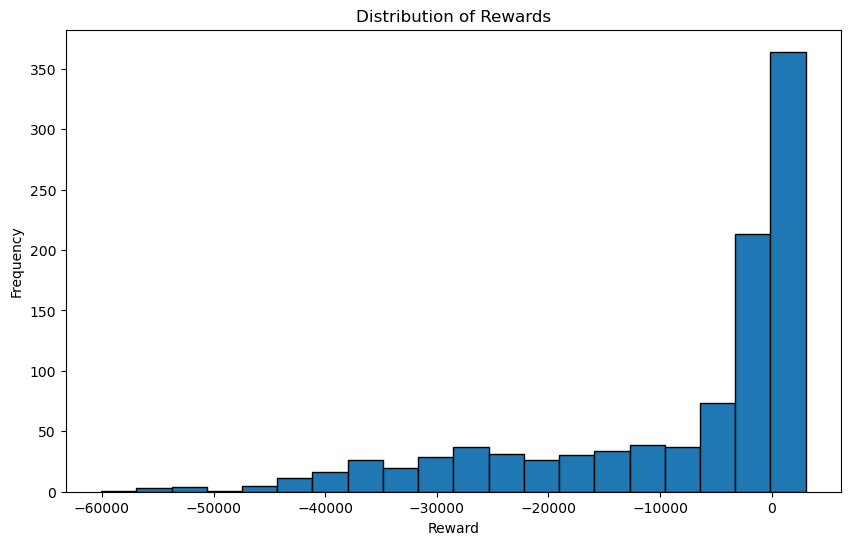

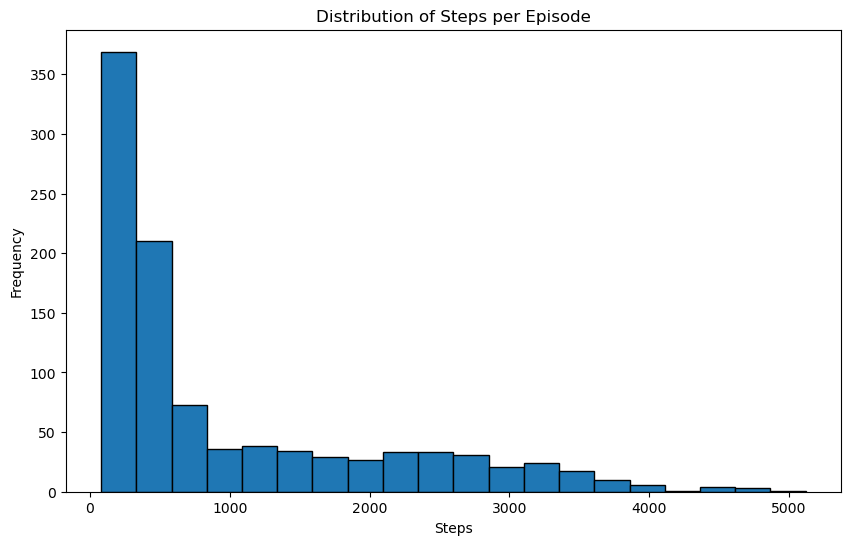

In [4]:
# Run simulations
env = TrafficEnvironment()
agent = RandomAgent(change_lane_percentage=50)
num_episodes = 1000
rewards = []
steps_list = []

for _ in range(num_episodes):
    episode_reward, episode_steps = run_episode(env, agent)
    rewards.append(episode_reward)
    steps_list.append(episode_steps)

# Analyze and visualize results
print(f"Results for {agent.__class__.__name__}, change lane percent 50")
print(f"Average reward over {num_episodes} episodes: {np.mean(rewards):.2f}")
print(f"Standard deviation of rewards: {np.std(rewards):.2f}")
print(f"Average number of steps per episode: {np.mean(steps_list):.2f}")
print(f"Standard deviation of steps: {np.std(steps_list):.2f}")

# Plot histogram of rewards
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, edgecolor='black')
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of steps
plt.figure(figsize=(10, 6))
plt.hist(steps_list, bins=20, edgecolor='black')
plt.title('Distribution of Steps per Episode')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

Results for RandomAgent, change lane percent 0
Average reward over 1000 episodes: -6413.45
Standard deviation of rewards: 10819.55
Average number of steps per episode: 1041.94
Standard deviation of steps: 1081.55


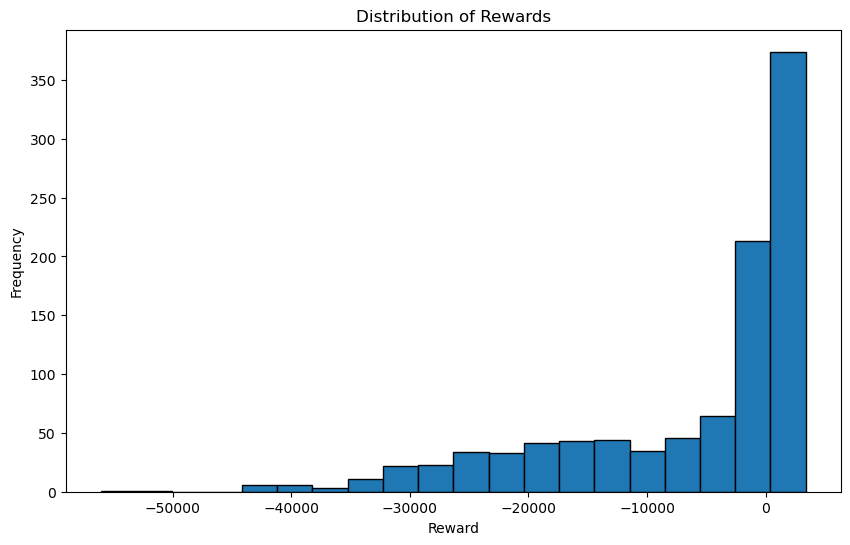

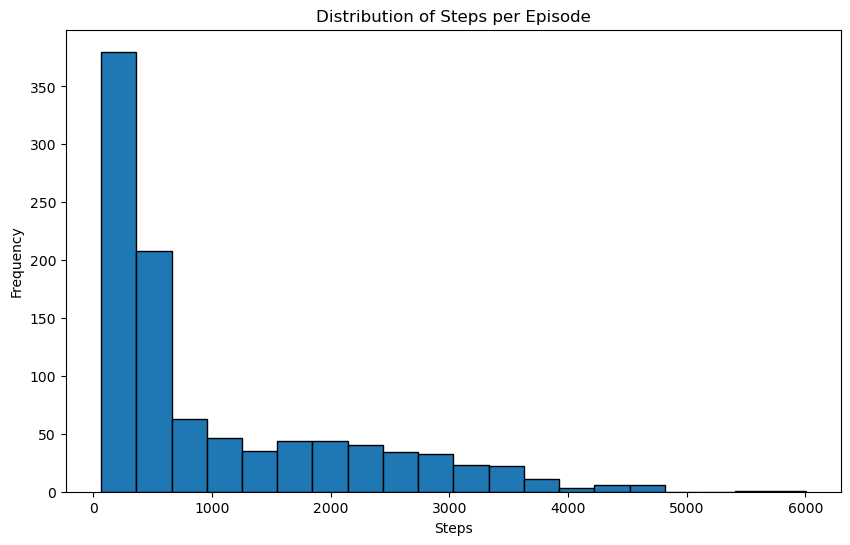

In [5]:
# Run simulations
env = TrafficEnvironment()
agent = RandomAgent(change_lane_percentage=0)
num_episodes = 1000
rewards = []
steps_list = []

for _ in range(num_episodes):
    episode_reward, episode_steps = run_episode(env, agent)
    rewards.append(episode_reward)
    steps_list.append(episode_steps)

# Analyze and visualize results
print(f"Results for {agent.__class__.__name__}, change lane percent 0")
print(f"Average reward over {num_episodes} episodes: {np.mean(rewards):.2f}")
print(f"Standard deviation of rewards: {np.std(rewards):.2f}")
print(f"Average number of steps per episode: {np.mean(steps_list):.2f}")
print(f"Standard deviation of steps: {np.std(steps_list):.2f}")

# Plot histogram of rewards
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, edgecolor='black')
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of steps
plt.figure(figsize=(10, 6))
plt.hist(steps_list, bins=20, edgecolor='black')
plt.title('Distribution of Steps per Episode')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()